## PML
Two dimensional scalar wave equation has the following form:
$$ u_{tt} - v^2(u_{xx} + u_{xx}) = f(x, t)$$
The PML for it is:
\begin{equation}
\begin{split}
&u_{tt} + (\sigma_x + \sigma_z)u_{t} + \sigma_x\sigma_z u = v^2(u_{xx} + \phi_x + u_{zz} + \psi_z) + f\\
&\phi_t = -\sigma_x\phi - (\sigma_z - \sigma_x) u_x\\
&\psi_t = -\sigma_z\phi - (\sigma_x - \sigma_z) u_z
\end{split}
\end{equation}

Using central difference for $u_{tt}$ and $u_t$:
$$ \frac{u^{n+1} - 2u^n + u^{n-1}}{dt^2} + (\sigma_x + \sigma_z)\frac{u^{n+1}-u^{n-1}}{2dt} + \sigma_x\sigma_z u = v^2(u^n_{xx} + \phi^n_x + u^n_{zz} + \psi^n_z) + f^n$$
Using a forward difference for $\phi_t$:
$$\frac{\phi^{n+1} - \phi^{n}}{dt} = -\sigma_x \phi^n - (\sigma_z - \sigma_x) u^n_x$$
and using the same for $\psi_t$
$$\frac{\psi^{n+1} - \psi^{n}}{dt} = -\sigma_z \psi^n - (\sigma_x - \sigma_z) u^n_z$$

In [39]:
from acoustic2d import Solver
from matplotlib import pyplot as plt 
import numpy as np
from matplotlib.animation import FuncAnimation

In [61]:
h = 0.01
dt = 0.001
nx = nz = 200
v0 = 1.5
model = np.ones((nx + 1, nz + 1)) * v0
source_xz = [nz//2, nx//2]
sol = Solver(model, h, dt, source_xz)
nt = len(sol.source_time)
print(f'nt = {nt}')

CFL number is 0.15
nt = 1333


In [62]:
# save_nt = np.arange(nt//4, nt, nt//4)
save_nt = [200, 300, 500, 850]
sol.step(save_nt=save_nt)
wavefield = sol.wavefield

Propagating:: 100%|██████████| 1333/1333 [00:06<00:00, 219.86it/s]


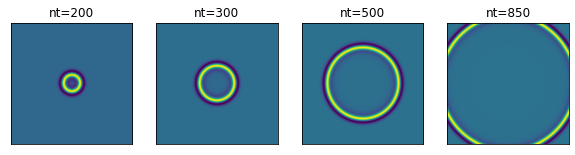

In [63]:
fig, ax = plt.subplots(1, len(save_nt),figsize=(10, 6))
for i in range(len(save_nt)):
    ax[i].imshow(wavefield[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(f'nt={save_nt[i]}')
plt.show()
# np.savetxt('wavefields_t1.txt', wavefield[nt1])

In [9]:
# np.savetxt('./wavefield2d_t0.txt', wavefield[0])
# np.savetxt('./wavefield2d_t1.txt', wavefield[1])
# np.savetxt('./wavefield2d_t2.txt', wavefield[2])
# np.savetxt('./wavefield2d_t3.txt', wavefield[3])

In [10]:
# nt = len(wavefield)
# wavefield_plot = wavefield * 1e5
# %matplotlib notebook
# fig = plt.figure(figsize=(5, 3))
# ax = fig.add_subplot(111)
# img = ax.imshow(np.zeros_like(wavefield[0]))
# #fig.colorbar(img, ax=ax)

# def animate(it):
#     u = wavefield_plot[it]
#     ax.set_title(f'nt={it}')
#     img.set_data(u)
#     return img

# anim = FuncAnimation(fig, animate, frames=nt, interval=5)
# plt.show()

## Non-homogeneous model

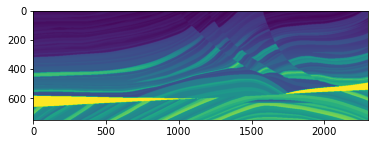

In [14]:
marmousi = np.load('marmousi_vel.npy')
marmousi = marmousi / 1000 # km/s
plt.imshow(marmousi)

(201, 201)
1.63 4.45


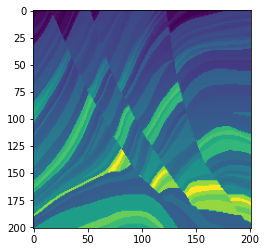

In [66]:
model = marmousi[np.arange(100, 501, 2), :][:,np.arange(1000, 2001, 5)]
plt.imshow(model)
print(model.shape)
print(model.min(), model.max())

In [87]:
h = 0.01
dt = 0.001
nx = model.shape[1] - 1
nz = model.shape[0] - 1
source_xz = [nz//2, nx//2]
sol = Solver(model, h, dt, source_xz)
nt = len(sol.source_time)
print(f'nt = {nt}')

CFL number is 0.4449999809265137
nt = 1226


In [88]:
save_nt = [200, 250, 350, 450]
sol.step(save_nt=save_nt)
wavefield = sol.wavefield

Propagating:: 100%|██████████| 1226/1226 [00:05<00:00, 205.29it/s]


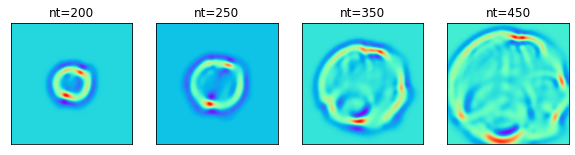

In [89]:
fig, ax = plt.subplots(1, len(save_nt),figsize=(10, 6))
for i in range(len(save_nt)):
    ax[i].imshow(wavefield[i], cmap='rainbow')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(f'nt={save_nt[i]}')
plt.show()
# np.savetxt('wavefields_t1.txt', wavefield[nt1])

In [90]:
np.savetxt('./marmousi_t0.txt', wavefield[0])
np.savetxt('./marmousi_t1.txt', wavefield[1])
np.savetxt('./marmousi_t2.txt', wavefield[2])
np.savetxt('./marmousi_t3.txt', wavefield[3])